Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load Data

In [4]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

### clean continous variables

In [6]:
# check missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Fill missing for age
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

<Figure size 432x288 with 0 Axes>

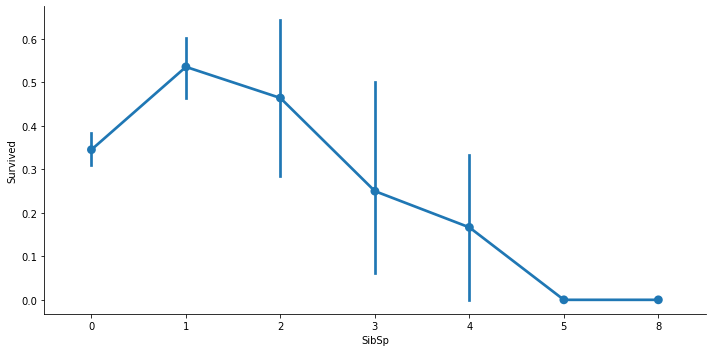

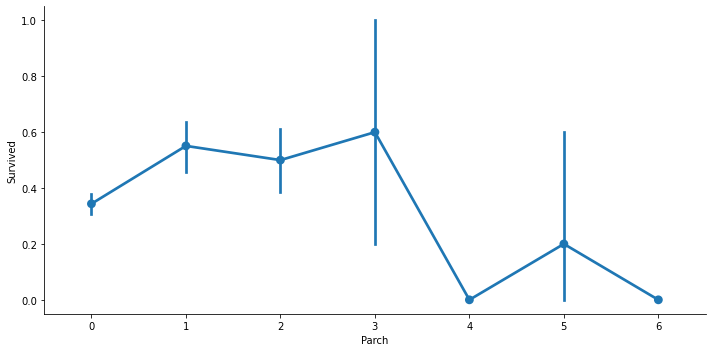

In [17]:
# Combine SibSp & Parch
for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2)

The more number of family members aboard, the less likely to survive

In [18]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [19]:
# drop unnecessary features
titanic.drop(['SibSp','Parch','PassengerId'], axis=1, inplace=True)

### clean categorical variables

In [22]:
# fill in missing & create indicator for Cabin
titanic.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
              ..
A20            1
C90            1
C54            1
D49            1
A7             1
Name: Cabin, Length: 147, dtype: int64

In [27]:
# survival rate for cabin that is missing and non-missing
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

Cabin that is missing has a much lower survival rate. 

In [28]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)

In [30]:
# convert sex to numeric
gender_num = {'male':0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

In [32]:
# drop unnecessary features
titanic.drop(['Name','Cabin','Embarked','Ticket'], axis=1, inplace=True)

In [33]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [5]:
# write out cleaned data
titanic.to_csv('data/titanic_cleaned.csv',index=False)